In [1]:
from pyemittance import PyEmittance
import numpy as np

In [2]:
# Sector LI28
#   'WS21' 'WS22' 'WS23' 'WS24' ...
# 'WS27644' 'WS28144' 'WS28444' 'WS28744'



In [3]:
meas = PyEmittance(config_name='LCLS_WSLI28')

In [4]:
meas.config_name

'LCLS_WSLI28'

## Three options for setting configurations for measurements:
1. Make directory under `configs/` with Machine_Device_Name with all needed jsons (see `configs/LCLS2_OTR3`), and pass dir name to `meas.config_name`
2. Change params and configs through class attributes
3. pass the dictionary to pyemittance (same keys and subkeys as `meas.config_dict` below)

In [6]:
# see all configs with command below
meas.config_dict.keys()

dict_keys(['beamline_info', 'img_proc', 'meas_pv_info', 'opt_pv_info', 'save_scalar_pvs', 'savepaths'])

### put in configs the wires you want to use only, in order
### wire at which twiss will be measured should have rmatrices as unit matrix
### and twiss0 should be the model twiss at that same wire

In [7]:
meas.config_dict['beamline_info']

{'name': 'LCLS',
 'm_0': 0.000511,
 'energy': 6.846,
 'Twiss0 location': 'WS28144',
 'Twiss0': [1e-06, 1e-06, 62.404, 35.417, -1.248, 0.672],
 'Wire1': {'location': 644, 'rMatx': [1, 2, 3, 4], 'rMaty': [1, 2, 3, 4]},
 'Wire2': {'location': 144, 'rMatx': [1, 0, 0, 1], 'rMaty': [1, 0, 0, 1]},
 'Wire3': {'location': 444, 'rMatx': [1, 2, 3, 4], 'rMaty': [1, 2, 3, 4]},
 'Wire4': {'location': 744, 'rMatx': [1, 2, 3, 4], 'rMaty': [1, 2, 3, 4]}}

In [7]:
meas.quad_init

[-6, -4, -2, 0]

## Example running offline with random beam size numbers

In [8]:
meas.online = False

In [9]:
meas.emit_calc_type = 'bla'

In [10]:
res = meas.measure_emittance()

Exception: ('Cannot perform measurement: ', "emit_calc_type needs to be 'quadscan' or 'multiwire'.")

## Example running online (do not run on machine!)

In [7]:
meas.online = True

In [11]:
try:
    res = meas.measure_emittance()
except:
    pass # epics can't connect on my local pc

Running online!
cannot connect to OTRS:IN20:541:RESOLUTION


## Example running with some random beamsize model 
### (can be any simulation, just need to pass pyemittance the beamsize fn)

In [11]:
def get_bs_model(*args):
    return np.random.normal(1e-6, 5e-5), np.random.normal(1e-6, 5e-6), 0, 0

In [12]:
meas.use_model=True
meas.online = False # meaningless when running with a model
meas.get_bs_model = get_bs_model

Running offline.


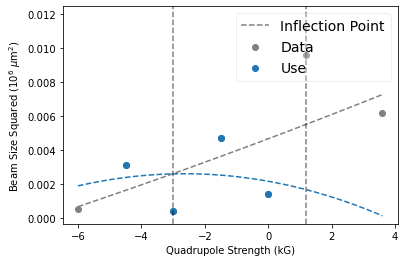

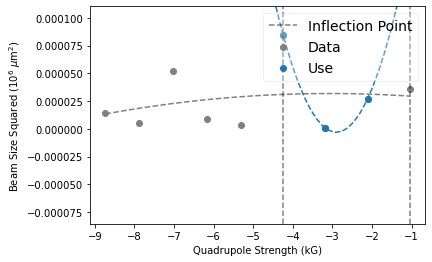

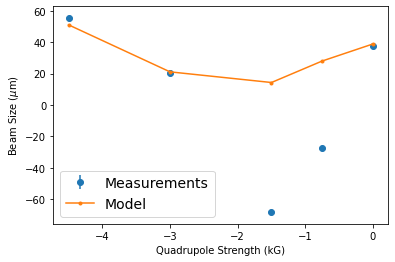

In [13]:
res = meas.measure_emittance()

# Older version emittance evaluation functions

In [16]:
from pyemittance.emit_eval_example import eval_emit_surrogate, eval_emit_machine

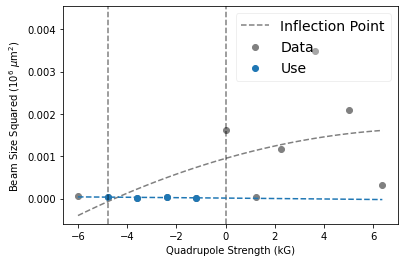

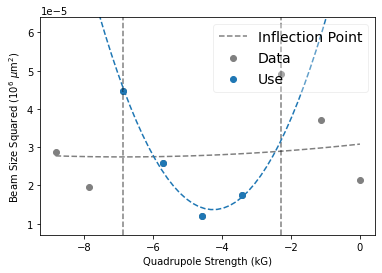

Savepaths not set. Please set them in 'configs/savepaths.json'
Using examples directory:  /Users/smiskov/Documents/SLAC/PyEmittance/examples


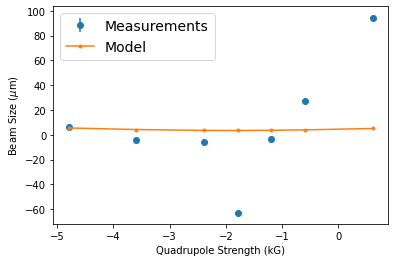

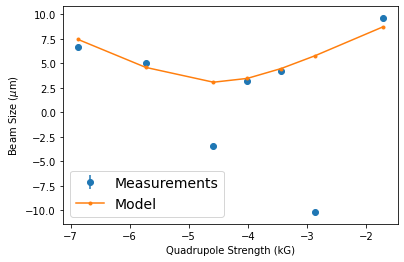

In [18]:
eval_emit_surrogate(
    get_bs_model, # need beamsize model for 'surrogate model'
    quad_init=[-6, -4, -2, 0],
    adapt_ranges=True,
    num_points=7,
    check_sym=True,
    infl_check=True,
    add_pnts=True,
    show_plots=True,
    add_noise=False,
    use_prev_meas=False,
    quad_tol=0.05,
    save_runs=False,
    calc_bmag=False,
);

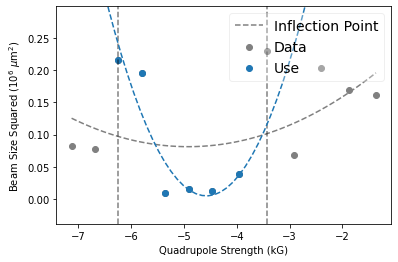

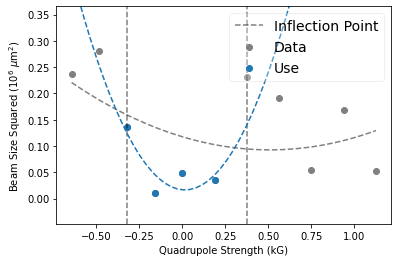

Savepaths not set. Please set them in 'configs/savepaths.json'
Using examples directory:  /Users/smiskov/Documents/SLAC/PyEmittance/examples


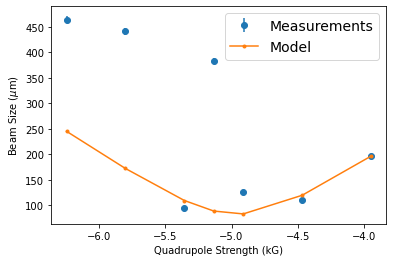

In [19]:
eval_emit_machine(
    quad_init=[-6, -4, -2, 0],
    online=False,
    config_name='FACET_nominal',
    meas_type='OTRS',
    adapt_ranges=True,
    num_points=7,
    check_sym=True,
    infl_check=True,
    add_pnts=True,
    show_plots=True,
    use_prev_meas=True,
    quad_tol=0.05,
    save_runs=False,
    calc_bmag=True,
);